**Perhatikan tata urutan peraturan di Indonesia**

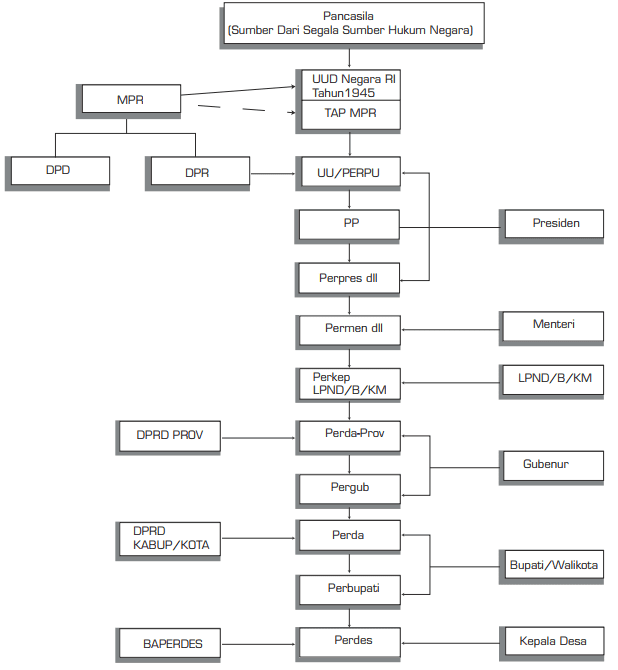

Berdasarkan tata urutan tersebut ambil salah satu contoh data di
[https://peraturan.go.id/](https://peraturan.go.id/).
yang dapat menggambarkan urutan peraturan tersebut. 

perhatikan dasar hukum, pelaksana aturan, 

contoh [PENYELENGGARAAN SISTEM DAN TRANSAKSI ELEKTRONIK](https://peraturan.go.id/peraturan/view.html?id=11e44c4f5baa02a0a922313232303435)





![Informasi Tambahan](SISTEM%20PEMERINTAHAN%20RI.PNG)

Buatlah Vocabulary Turtle berdasarkan tersebut. Pastikan vocabulary dan isntance bisa menggunakan entailment regime

In [71]:
# reload extension juputer-rdfify
%reload_ext jupyter-rdfify

In [72]:
%rdf turtle --help

usage: %rdf turtle [-h] [--serialize {turtle,json-ld,xml,n3}]
                   [--display {graph,table,raw,none}] [--label LABEL]
                   [--prefix] [--entail {rdfs,owl,rdfs+owl}]

optional arguments:
  -h, --help            show this help message and exit
  --serialize {turtle,json-ld,xml,n3}, -s {turtle,json-ld,xml,n3}
                        Format for serializing when display is set to raw.
  --display {graph,table,raw,none}, -d {graph,table,raw,none}
                        How output is displayed
  --label LABEL, -l LABEL
                        Store graph locally with this label
  --prefix, -p          Define a prefix which gets prepend to every query.
                        Useful for PREFIX declarations
  --entail {rdfs,owl,rdfs+owl}, -e {rdfs,owl,rdfs+owl}
                        Uses a brute force implementation of the finite
                        version of RDFS semantics or OWL 2 RL. Uses owlrl
                        python package.



In [73]:
%rdf --help

usage: %rdf [-h] [--verbose] [--return-store]
            {turtle,n3,json-ld,xml,sparql,shex,graph} ...

positional arguments:
  {turtle,n3,json-ld,xml,sparql,shex,graph}
                        RDF modules
    turtle              Turtle module
    n3                  Notation 3 module
    json-ld             JSON-LD module
    xml                 XML+RDF module
    sparql              SPARQL module
    shex                ShEx module
    graph               Graph management module

optional arguments:
  -h, --help            show this help message and exit
  --verbose, -v         Enable verbose output
  --return-store, -r    Returns a copy of all present elements (graphs,
                        schemas, etc.)



In [74]:
%%rdf turtle --prefix

# setup global prefixes for the notebook
PREFIX ex: <http://example.org/#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

Turtle: Stored prefix.


In [75]:
# Uud is a Peraturan
# Uud created by Lembaga
# Legislatif, Eksekutif, dan Yudikatif are Lembaga
# Mpr is subClassOf Legislatif
# Presiden is subClassOf Eksekutif
# Mahkamah Agung is subClassOf Yudikatif
# Perpu is a Peraturan
# Perpu formulated by Presiden and MPR

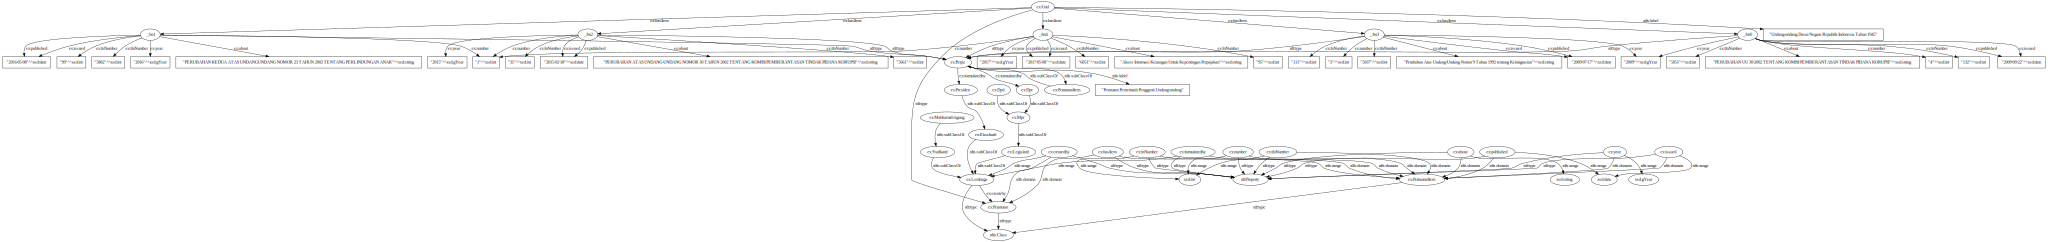

In [76]:
%%rdf turtle --label peraturan

# classes
ex:Peraturan a rdfs:Class .
ex:PertauranItem a rdfs:Class .
ex:Lembaga a rdfs:Class .

# subclasses
ex:Legislatif rdfs:subClassOf ex:Lembaga .
ex:Eksekutif rdfs:subClassOf ex:Lembaga .
ex:Yudikatif rdfs:subClassOf ex:Lembaga .

ex:Mpr rdfs:subClassOf ex:Legislatif .
ex:Presiden rdfs:subClassOf ex:Eksekutif .
ex:MahkamahAgung rdfs:subClassOf ex:Yudikatif .

ex:Dpd rdfs:subClassOf ex:Mpr .
ex:Dpr rdfs:subClassOf ex:Mpr .

ex:Perpu rdfs:subClassOf ex:PeraturanItem .
ex:PeraturanItem rdfs:subClassOf ex:Perpu .

# properties
ex:createdby a rdf:Property .
ex:formulatedby a rdf:Property .
ex:number a rdf:Property .
ex:year a rdf:Property .
ex:about a rdf:Property .
ex:issued a rdf:Property .
ex:lnNumber a rdf:Property .
ex:tlnNumber a rdf:Property .
ex:published a rdf:Property .
ex:hasItem a rdf:Property .

# domain and range
ex:createdby rdfs:domain ex:Peraturan .
ex:createdby rdfs:range ex:Lembaga .

ex:formulatedby rdfs:domain ex:PertauranItem .
ex:formulatedby rdfs:range ex:Lembaga .

ex:number rdfs:domain ex:PertauranItem .
ex:number rdfs:range xsd:int .

ex:year rdfs:domain ex:PertauranItem .
ex:year rdfs:range xsd:gYear .

ex:about rdfs:domain ex:PertauranItem .
ex:about rdfs:range xsd:string .

ex:issued rdfs:domain ex:PertauranItem .
ex:issued rdfs:range xsd:date .

ex:lnNumber rdfs:domain ex:PertauranItem .
ex:lnNumber rdfs:range xsd:int .

ex:tlnNumber rdfs:domain ex:PertauranItem .
ex:tlnNumber rdfs:range xsd:int .

ex:published rdfs:domain ex:PertauranItem .
ex:published rdfs:range xsd:date .

ex:hasItem rdfs:domain ex:Peraturan .
ex:hasItem rdfs:range ex:PertauranItem .

# instances
ex:Lembaga ex:createby ex:Peraturan .
ex:Perpu ex:formulatedby ex:Presiden, ex:Dpr .
ex:Perpu rdfs:label "Peraturan Pemerintah Pengganti Undang-undang" .

ex:Uud a ex:Peraturan ;
    rdfs:label "Undang-undang Dasar Negara Republik Indonesia Tahun 1945" ;
    ex:hasItem [
        a ex:Perpu ;
        ex:number "1"^^xsd:int ;
        ex:year "2017"^^xsd:gYear ;
        ex:about "Akses Informasi Keuangan Untuk Kepentingan Perpajakan"^^xsd:string ;
        ex:issued "2017-05-08"^^xsd:date ;
        ex:lnNumber "95"^^xsd:int ;
        ex:tlnNumber "6051"^^xsd:int ;
        ex:published "2017-05-08"^^xsd:date ;
    ] ;

    ex:hasItem [
        a ex:Perpu ;
        ex:number "1"^^xsd:int ;
        ex:year "2016"^^xsd:gYear ;
        ex:about "PERUBAHAN KEDUA ATAS UNDANGUNDANG NOMOR 23 TAHUN 2002 TENTANG PERLINDUNGAN ANAK"^^xsd:string ;
        ex:issued "2016-05-08"^^xsd:date ;
        ex:lnNumber "99"^^xsd:int ;
        ex:tlnNumber "5882"^^xsd:int ;
        ex:published "2016-05-08"^^xsd:date ;
    ] ;

    ex:hasItem [
        a ex:Perpu ;
        ex:number "1"^^xsd:int ;
        ex:year "2015"^^xsd:gYear ;
        ex:about "PERUBAHAN ATAS UNDANG-UNDANG NOMOR 30 TAHUN 2002 TENTANG KOMISI PEMBERANTASAN TINDAK PIDANA KORUPSI"^^xsd:string ;
        ex:issued "2015-02-18"^^xsd:date ;
        ex:lnNumber "31"^^xsd:int ;
        ex:tlnNumber "5661"^^xsd:int ;
        ex:published "2015-02-18"^^xsd:date ;
    ] ;
    
    ex:hasItem [
        a ex:Perpu ;
        ex:number "4"^^xsd:int ;
        ex:year "2009"^^xsd:gYear ;
        ex:about "PERUBAHAN UU 30-2002 TENTANG KOMISI PEMBERANTASAN TINDAK PIDANA KORUPSI"^^xsd:string ;
        ex:issued "2009-09-22"^^xsd:date ;
        ex:lnNumber "132"^^xsd:int ;
        ex:tlnNumber "5051"^^xsd:int ;
        ex:published "2009-09-22"^^xsd:date ;
    ] ;

    ex:hasItem [
        a ex:Perpu ;
        ex:number "3"^^xsd:int ;
        ex:year "2009"^^xsd:gYear ;
        ex:about "Perubahan Atas Undang-Undang Nomor 9 Tahun 1992 tentang Keimigrasian"^^xsd:string ;
        ex:issued "2009-07-17"^^xsd:date ;
        ex:lnNumber "111"^^xsd:int ;
        ex:tlnNumber "5037"^^xsd:int ;
        ex:published "2009-07-17"^^xsd:date ;
    ] .

Buatlah Instance data berdasarkan data tersebut

Error: argument action: invalid choice: 'rdfs' (choose from 'list', 'remove', 'draw', 'entail-rdfs', 'entail-owl', 'entail-rdfs+owl')



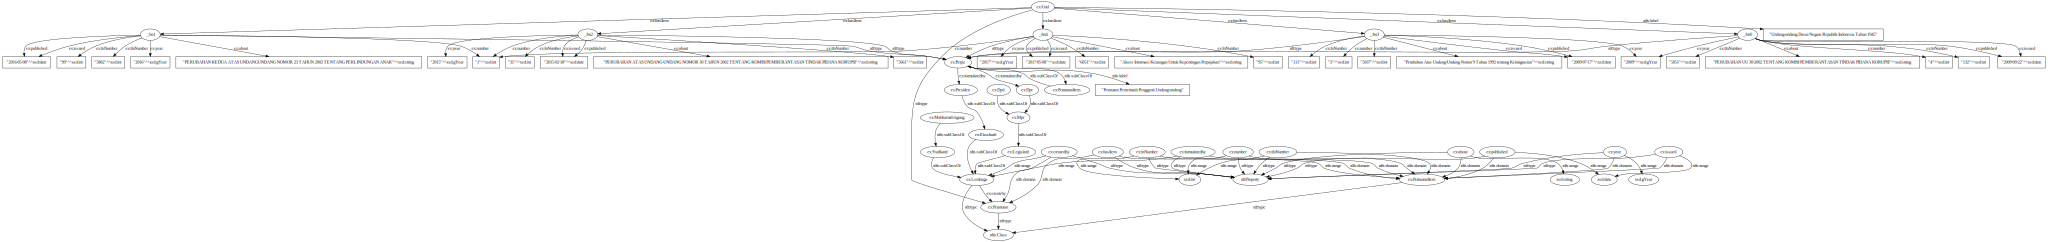

In [77]:
%rdf graph --entail rdfs --label peraturan
%rdf graph draw --label peraturan

Buatlah 2 contoh SPARL query dari data yang sudah anda buat

In [88]:
%%rdf sparql --local peraturan

# find all peraturan item where published date before 2016
SELECT *
WHERE {
    ?peraturan a ex:Perpu .
    ?peraturan ex:number ?number .
    ?peraturan ex:year ?year .
    ?peraturan ex:about ?about .
    ?peraturan ex:issued ?issued .
    ?peraturan ex:lnNumber ?lnNumber .
    ?peraturan ex:tlnNumber ?tlnNumber .
    ?peraturan ex:published ?published .
    FILTER (?published < "2016-01-01"^^xsd:date)
}


?year,?issued,?lnNumber,?tlnNumber,?peraturan,?published,?number,?about
2015,2015-02-18,31,5661,n5aa7ba164b7e427b803d77280ccb66ceb3,2015-02-18,1,PERUBAHAN ATAS UNDANG-UNDANG NOMOR 30 TAHUN 2002 TENTANG KOMISI PEMBERANTASAN TINDAK PIDANA KORUPSI
2009,2009-09-22,132,5051,n5aa7ba164b7e427b803d77280ccb66ceb4,2009-09-22,4,PERUBAHAN UU 30-2002 TENTANG KOMISI PEMBERANTASAN TINDAK PIDANA KORUPSI
2009,2009-07-17,111,5037,n5aa7ba164b7e427b803d77280ccb66ceb5,2009-07-17,3,Perubahan Atas Undang-Undang Nomor 9 Tahun 1992 tentang Keimigrasian


In [89]:
%%rdf sparql --local peraturan

# find all peraturan item where about contain "Korupsi" or "KORUPSI"
SELECT *
WHERE {
    ?peraturan a ex:Perpu .
    ?peraturan ex:number ?number .
    ?peraturan ex:year ?year .
    ?peraturan ex:about ?about .
    ?peraturan ex:issued ?issued .
    ?peraturan ex:lnNumber ?lnNumber .
    ?peraturan ex:tlnNumber ?tlnNumber .
    ?peraturan ex:published ?published .
    FILTER (regex(?about, "Korupsi", "i"))
}

?year,?issued,?lnNumber,?tlnNumber,?peraturan,?published,?number,?about
2015,2015-02-18,31,5661,n5aa7ba164b7e427b803d77280ccb66ceb3,2015-02-18,1,PERUBAHAN ATAS UNDANG-UNDANG NOMOR 30 TAHUN 2002 TENTANG KOMISI PEMBERANTASAN TINDAK PIDANA KORUPSI
2009,2009-09-22,132,5051,n5aa7ba164b7e427b803d77280ccb66ceb4,2009-09-22,4,PERUBAHAN UU 30-2002 TENTANG KOMISI PEMBERANTASAN TINDAK PIDANA KORUPSI


In [91]:
%%rdf sparql --local peraturan

# find all data of perpu where about contain "perubahan" or "PERUBAHAN"
SELECT *
WHERE {
    ?peraturan a ex:Perpu .
    ?peraturan ex:number ?number .
    ?peraturan ex:year ?year .
    ?peraturan ex:about ?about .
    ?peraturan ex:issued ?issued .
    ?peraturan ex:lnNumber ?lnNumber .
    ?peraturan ex:tlnNumber ?tlnNumber .
    ?peraturan ex:published ?published .
    FILTER (regex(?about, "perubahan", "i"))
}

?year,?issued,?lnNumber,?tlnNumber,?peraturan,?published,?number,?about
2016,2016-05-08,99,5882,n5aa7ba164b7e427b803d77280ccb66ceb2,2016-05-08,1,PERUBAHAN KEDUA ATAS UNDANGUNDANG NOMOR 23 TAHUN 2002 TENTANG PERLINDUNGAN ANAK
2015,2015-02-18,31,5661,n5aa7ba164b7e427b803d77280ccb66ceb3,2015-02-18,1,PERUBAHAN ATAS UNDANG-UNDANG NOMOR 30 TAHUN 2002 TENTANG KOMISI PEMBERANTASAN TINDAK PIDANA KORUPSI
2009,2009-09-22,132,5051,n5aa7ba164b7e427b803d77280ccb66ceb4,2009-09-22,4,PERUBAHAN UU 30-2002 TENTANG KOMISI PEMBERANTASAN TINDAK PIDANA KORUPSI
2009,2009-07-17,111,5037,n5aa7ba164b7e427b803d77280ccb66ceb5,2009-07-17,3,Perubahan Atas Undang-Undang Nomor 9 Tahun 1992 tentang Keimigrasian
